# Our first machine learning model: Logistic Regression

In [14]:
# Import our libraries 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [15]:
# Load the titanic data set into a pandas dataframe.
df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [16]:
# Identify which columns have null values. 
df.isnull().sum()

# age and cabin have a LOT of nulls. embarked has 2 but we can probably drop those without compromising the data
df.dropna(subset='embarked', inplace=True) # this drops the 2 rows w/ null values from embarked. now only age and cabin have nulls.
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [17]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum() #yay no duplicate rows 

0

# Use sns.pariplot to visualize.
* Set the hue='survived'.

c:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


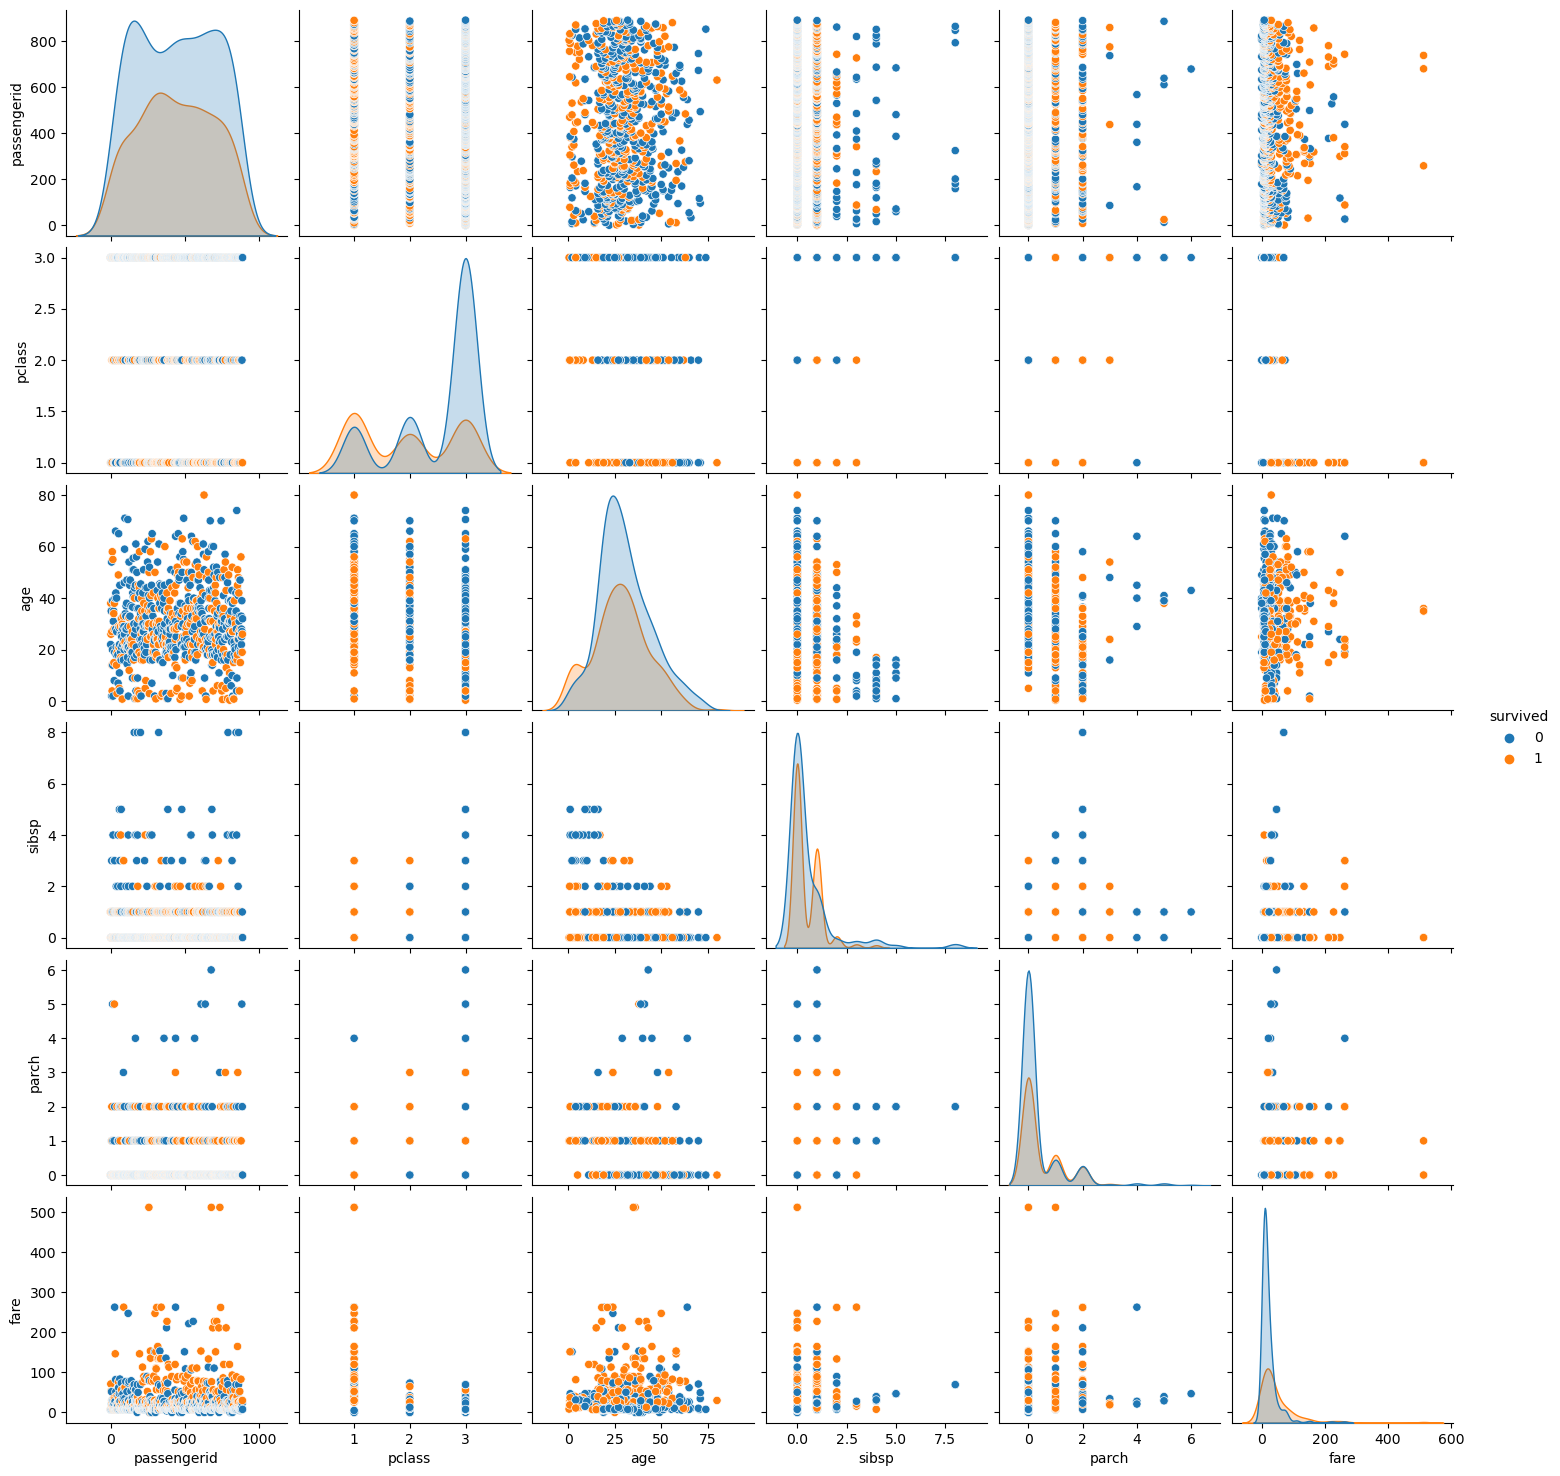

In [18]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue='survived')


# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [19]:
# Convert the sex column into a continuous variable by using pd.get_dummies
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()


,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [20]:
# Select our features
selected_features = ['fare', 'sex_male']

# Set X to be the features we are going to use.
X = df[selected_features]

# Set y to be our target variable. 
y = df['survived']

# Split our data into the testing and training groups. 

In [21]:
from sklearn.model_selection import train_test_split
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(711, 2) (178, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [25]:
# Initalize our model
model = LogisticRegression()

# Train our model using our training data.
model.fit(X=X_train, y=y_train)


LogisticRegression()

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [26]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [27]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.775281
Precision Score: 0.690909
Recall Score: 0.622951
F1 Score 0.655172


Text(70.72222222222221, 0.5, 'Actual')

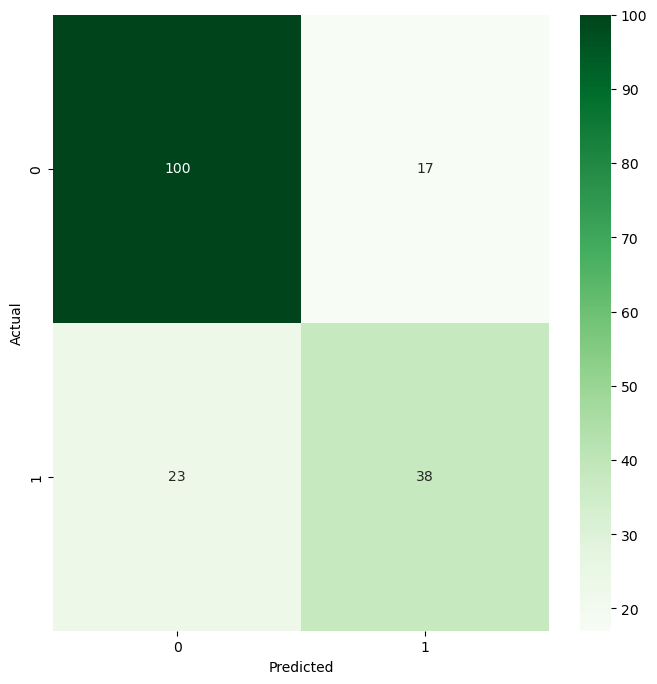

In [35]:
# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,8))

cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')





In [41]:
# How many True Positives and True Negatives did your model get?
print('%i True Negatives and %i True Positives' % (tn, tp))

100 True Negatives and 38 True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

MODEL ONE:
Accuracy Score: 0.775281
Precision Score: 0.690909
Recall Score: 0.622951
F1 Score 0.655172
MODEL 2:
Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score 0.761905


c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(70.72222222222221, 0.5, 'Actual')

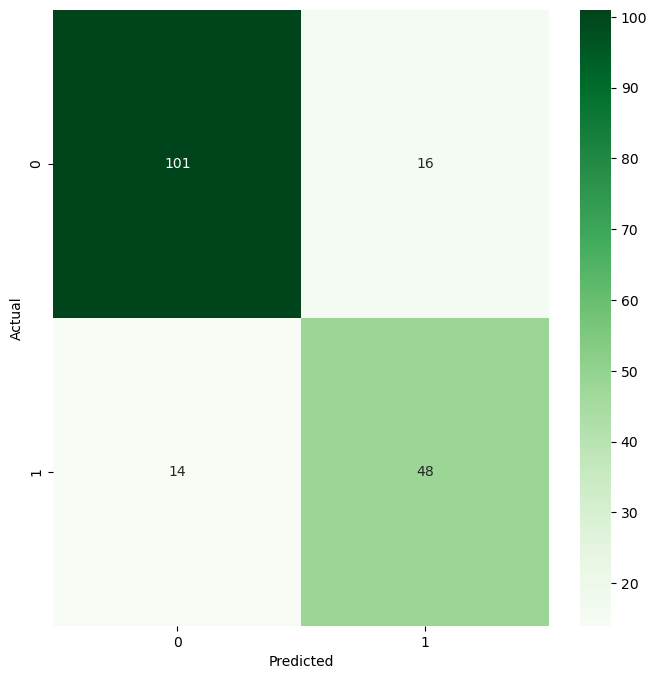

In [57]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df = pd.get_dummies(df, columns=['embarked', 'pclass'])

# Update your `selected_features` to include the new pclass and embarked features. 
selected_features = ['fare', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'pclass_1', 'pclass_2', 'pclass_3']

# Define your X and y variables
X = df[selected_features]
y = df['survived']

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X=X_train, y=y_train)


# Make new predicitions using our testing data. 
y_pred = model_2.predict(X_test)

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_2 = recall_score(y_test, y_pred)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print('MODEL ONE:')
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)
print('MODEL 2:')
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# We se here than model 2 is better than model 1 in all measures.

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')




# EXTRA CREDIT 1. 
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

MODEL ONE:
Accuracy Score: 0.775281
Precision Score: 0.690909
Recall Score: 0.622951
F1 Score 0.655172
MODEL 2:
Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score 0.761905
MODEL 3:
Accuracy Score: 0.786517
Precision Score: 0.709091
Recall Score: 0.639344
F1 Score 0.672414


c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(70.72222222222221, 0.5, 'Actual')

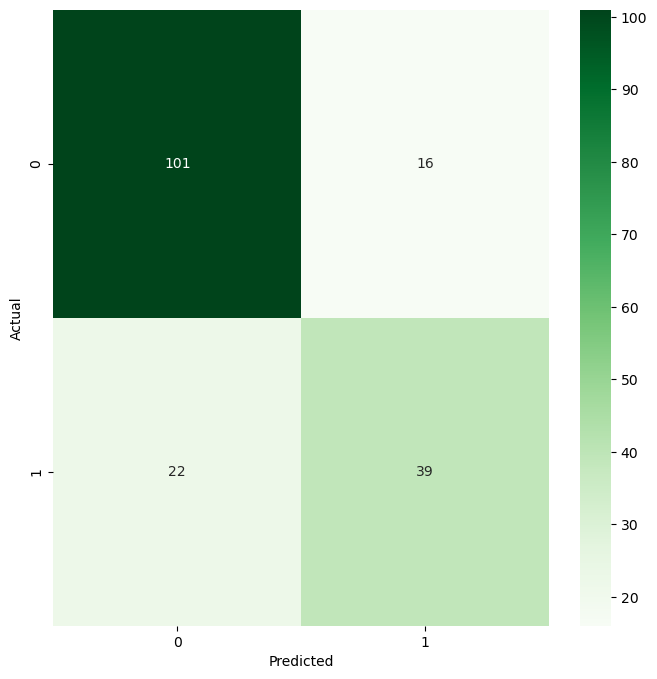

In [83]:
df = pd.read_csv('data/titanic.csv')

df.dropna(subset='embarked', inplace=True) # get rid of the nulls again

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df = pd.get_dummies(df, columns=['embarked', 'pclass'])

# Fill null age values with mean age.
df['age'] = df['age'].fillna(df['age'].mean())

# Create new traveled_alone feature
df['traveled_alone'] = (df['parch'] == 0) & (df['sibsp'] == 0)

# Update your `selected_features` to include the new traveled alone and age
selected_features = ['fare', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'pclass_1', 'pclass_2', 'pclass_3', 'traveled_alone', 'age']


# Define your X and y variables
X = df[selected_features]
y = df['survived']

# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.
model_3.fit(X=X_train, y=y_train)

# Make new predicitions using our testing data. 
y_pred = model_3.predict(X_test)

# Calculate our accuracy
accuracy_3 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_3 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_3 = recall_score(y_test, y_pred)

# Calculate your f1-score
f1_3 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print('MODEL ONE:')
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

print('MODEL 2:')
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

print("MODEL 3:")
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# EXTRA CREDIT 2:  

Use stats models to create a summary report.  Interpret the results. 

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       117
           1       0.71      0.64      0.67        61

    accuracy                           0.79       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.78      0.79      0.78       178



## My interpretation:

We see that generally, model 2 is better than both other models. This is to say that just using the fare and sex is not sufficient to make a model that is right enough of the time. Adding in class and port embarked from helps make a better model (I would guess that of those two, class is more important as a feature), but adding in age and whether someone travelled alone doesn't make the model much better, at least when the age column has so many missing values. Personally I would have assumed that age would be a strong enough feature that even when incomplete it improves the model, but I would have been wrong.